In [1]:
import os
import re

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import pandas as pd
import numpy as np
from functools import reduce
import matplotlib.pyplot as plt

In [24]:
# %connect_info
%qtconsole

In [2]:
os.chdir('/Users/cgu3/Documents/data')

In [3]:
pwd

'/Users/cgu3/Documents/data'

In [4]:
# Define the regular expression
pattern = re.compile(r'.*_with_protein_probability\.csv$')

# Get a list of all files in the current directory
files = os.listdir()

# Filter the list of files to only include those that match the regular expression
matching_files = [file for file in files if pattern.match(file)]

# Print the list of matching files
print(matching_files)

['SG_combined_protein_0993_with_protein_probability.csv', 'SG_combined_protein_7105_with_protein_probability.csv', 'SG_combined_protein_7103_with_protein_probability.csv', 'SG_combined_protein_0995_with_protein_probability.csv', 'SG_combined_protein_7100_with_protein_probability.csv', 'SG_combined_protein_0981_with_protein_probability.csv', 'SG_combined_protein_0982_with_protein_probability.csv', 'SG_combined_protein_0999_with_protein_probability.csv']


In [22]:
csv_files = []
i = 0
for file in matching_files:
    if file in ['SG_combined_protein_0981_with_protein_probability.csv', 'SG_combined_protein_0982_with_protein_probability.csv']:
        continue
    csv_file = pd.read_csv(file)
    csv_file.rename(columns={'protein_probability': 'protein_probability' + str(i)}, inplace=True)
    csv_files.append(csv_file)
    i += 1

In [23]:
len(csv_files)

6

In [24]:
csv_files[0].head()

,protein.Accession,protein_probability0
0,A0A024RBG1,0.999992
1,A0A075B6J2,0.939846
2,A0A075B6K0,0.991211
3,A0A075B6K2,0.331800
4,A0A075B6K4,0.469839


In [25]:
joined_file = reduce(lambda left,right: pd.merge(left,right,on='protein.Accession'), csv_files)
joined_file

,protein.Accession,protein_probability0,protein_probability1,protein_probability2,protein_probability3,protein_probability4,protein_probability5
0,A0A024RBG1,0.999992,0.999766,0.000000,0.990977,0.000000,0.999911
1,A0A075B6J2,0.939846,0.000000,0.000000,0.000000,0.000000,0.000000
2,A0A075B6K0,0.991211,0.000000,0.000000,0.000000,0.000000,0.000000
3,A0A075B6K2,0.331800,0.000000,0.000000,0.000000,0.997536,0.000000
4,A0A075B6K4,0.469839,0.000000,0.000000,0.000000,0.956788,0.356269
...,...,...,...,...,...,...,...
20421,Q9UI72,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
20422,Q9Y3F1,0.000000,0.748260,0.000000,0.000000,0.633704,0.000000
20423,Q9Y6C7,0.000000,0.000000,0.000000,0.000000,0.000000,0.652250
20424,Q9Y6Z2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [47]:
# joined_file['max'] = joined_file.iloc[:, 1:].mean(axis=1)
joined_file['max'] = joined_file.iloc[:, 1:].max(axis=1)
joined_file

,protein.Accession,protein_probability0,protein_probability1,protein_probability2,protein_probability3,protein_probability4,protein_probability5,max
0,A0A024RBG1,0.999992,0.999766,0.000000,0.990977,0.000000,0.999911,0.999992
1,A0A075B6J2,0.939846,0.000000,0.000000,0.000000,0.000000,0.000000,0.939846
2,A0A075B6K0,0.991211,0.000000,0.000000,0.000000,0.000000,0.000000,0.991211
3,A0A075B6K2,0.331800,0.000000,0.000000,0.000000,0.997536,0.000000,0.997536
4,A0A075B6K4,0.469839,0.000000,0.000000,0.000000,0.956788,0.356269,0.956788
...,...,...,...,...,...,...,...,...
20421,Q9UI72,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
20422,Q9Y3F1,0.000000,0.748260,0.000000,0.000000,0.633704,0.000000,0.748260
20423,Q9Y6C7,0.000000,0.000000,0.000000,0.000000,0.000000,0.652250,0.652250
20424,Q9Y6Z2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [48]:
soft_label = joined_file.loc[:, ['protein.Accession', 'max']]
soft_label.rename(columns={'max': 'protein_probability'}, inplace=True)
soft_label

,protein.Accession,protein_probability
0,A0A024RBG1,0.999992
1,A0A075B6J2,0.939846
2,A0A075B6K0,0.991211
3,A0A075B6K2,0.997536
4,A0A075B6K4,0.956788
...,...,...
20421,Q9UI72,0.000000
20422,Q9Y3F1,0.748260
20423,Q9Y6C7,0.652250
20424,Q9Y6Z2,0.000000


<Axes: >

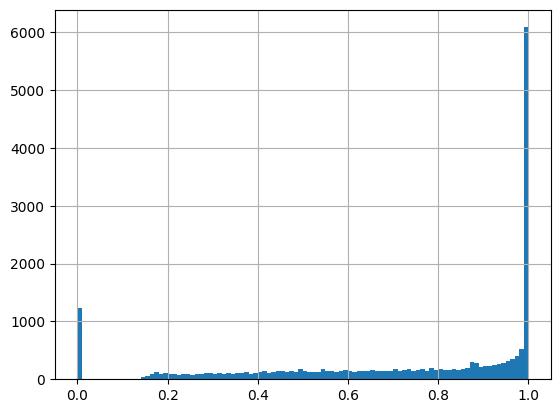

In [49]:
soft_label['protein_probability'].hist(bins=100)

In [50]:
soft_label.to_csv('soft_label.csv', index=False)

In [140]:
dat_train = pd.read_csv('/Users/cgu3/Documents/data/SG_combined_protein_0981_with_protein_probability.csv')

<Axes: >

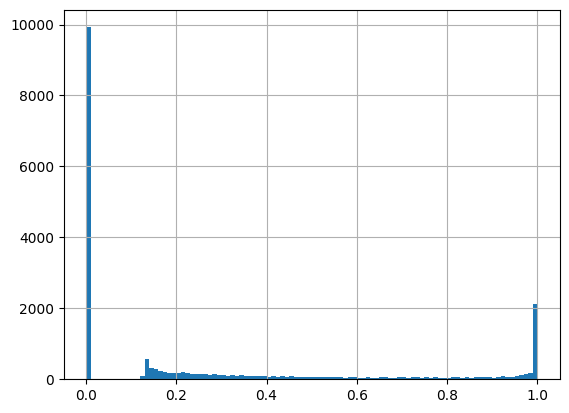

In [141]:
dat_train['protein_probability'].hist(bins=100)

In [142]:
dat_train = pd.merge(dat_train, soft_label, on='protein.Accession', suffixes=('', '_soft_label'))
dat_train['hard_label'] = np.where(dat_train['protein_probability_soft_label'] > 0.99, 1, 
                                   np.where(dat_train['protein_probability_soft_label'] < 0.5, 0, -1))
dat_train['hard_label'].value_counts()


hard_label
-1    9343
 1    6083
 0    5000
Name: count, dtype: int64

In [143]:
dat_train = dat_train[dat_train['hard_label'] != -1]

In [144]:
# dat_train = dat_train[(dat_train['protein_probability'] > 0.6) | (dat_train['protein_probability'] < 0.4)]

In [145]:
dat_train.to_csv('/Users/cgu3/Documents/data/0981-confident-hard-label.csv', index=False)